# 輝度変換

**輝度変換（intensity transformation）**は画像の明るさに関する調整のこと。線形変換と非線形変換に大別される。

## コントラスト調整（Contrast Adjustment）

線形変換によって明るさを全体的に調整する方法。

:::{admonition} 明るさ調整

$$
I_{\text{output}}(x, y)=\alpha \cdot I_{\text {input }}(x, y)+\beta
$$

- $I(x, y)$：ピクセル$(x,y)$の画素値
- $\alpha$ ：コントラスト係数（通常 1.0 が基準）
    - $\alpha>1$ ：コントラストを高く
    -  $0<\alpha<1$ ：コントラストを低く
- $\beta$ ：明るさのオフセット（brightness）

:::

上記はグレースケールの場合。RGB画像の場合は、R, G, B 各チャンネルに同じ調整を行う


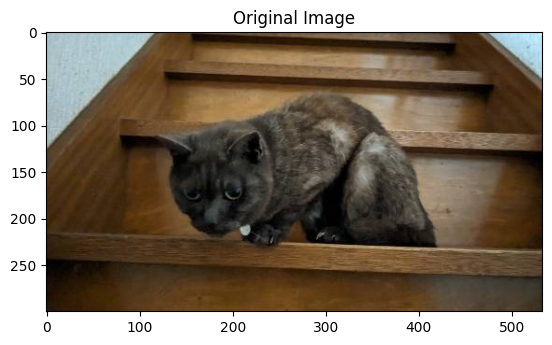

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = 'sample_images/cat2.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCVはBGRなのでRGBに変換

plt.imshow(img)
plt.title("Original Image")
plt.show()

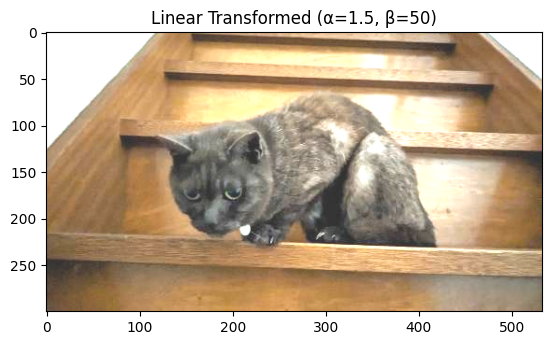

In [14]:
alpha = 1.5
beta = 50
bright_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
plt.imshow(bright_img)
plt.title(f"Linear Transformed (α={alpha}, β={beta})")
plt.show()

## ヒストグラム平坦化

画像の濃度分布を均等にし、コントラストを最大化する。

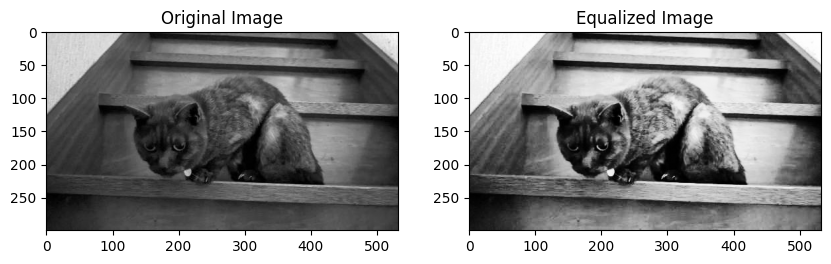

In [30]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
equ_img = cv2.equalizeHist(img)

fig, axes = plt.subplots(ncols=2, figsize=[10, 3])
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original Image")

axes[1].imshow(equ_img, cmap="gray")
axes[1].set_title("Equalized Image")
fig.show()

## 適用的ヒストグラム平坦化（CLAHE）

CLAHE（Contrast Limited Adaptive Histogram Equalization）：局所的にコントラストを調整して細部も見やすくするequalizeHist

CLAHE は、局所的な領域ごとにヒストグラム均等化を行い、細部を見やすくする手法。

通常のヒストグラム均等化（cv2.equalizeHist()）では、画像全体の明暗分布を一律に広げるが、CLAHEは小さなブロックごとに処理する。


#### 処理の流れ

1. 画像を小さな領域（タイル）に分割する
2. 各タイルに対してヒストグラム均等化を行う
3. コントラストが高すぎる領域には「クリップ制限」をかける（= CLAHE の "CL"）
4. タイル間の境界を滑らかにするために補間（interpolation）を行う


#### 参考

- [OpenCV CLAHEヒストグラム平坦化 #Python3 - Qiita](https://qiita.com/syukan3/items/bb44905bafd85b67789d)

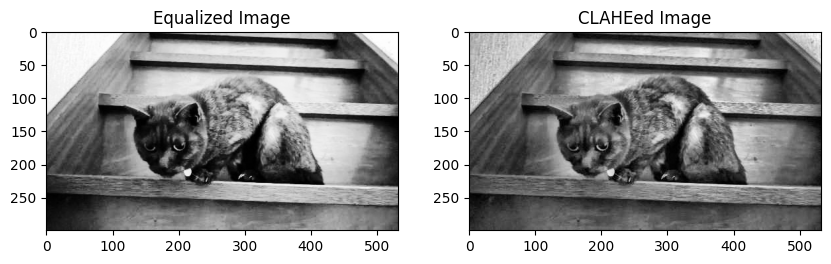

In [29]:
fig, axes = plt.subplots(ncols=2, figsize=[10, 3])
axes[0].imshow(equ_img, cmap="gray")
axes[0].set_title("Equalized Image")

# CLAHEオブジェクトを作成（clipLimit: コントラスト制限, tileGridSize: 分割数）
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# CLAHEを適用
cl_img = clahe.apply(img)

axes[1].imshow(cl_img, cmap="gray")
axes[1].set_title("CLAHEed Image")
fig.show()